<a href="https://colab.research.google.com/github/RM-RAMASAMY/CRISP_DM_SEMMA_AND_KDD-/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the data set:

## *Weather Forecast Dataset*
This dataset is ideal for beginners looking to practice machine learning, specifically using classification techniques.
With 2,500 weather observations, it’s a simple yet practical dataset for learning how to predict rainfall based on various weather conditions.

### Features in the Dataset:

1.   Temperature: Temperature recorded in degrees Celsius.
2.   Humidity: Relative humidity measured as a percentage.
3.   Wind Speed: Wind speed measured in km/h.
4.   Cloud Cover: Percentage of the sky covered by clouds.
5.   Pressure: Atmospheric pressure measured in hPa (hectopascals).
6.   Rain: The target variable for classification, indicating the occurrence of rain. It is a binary variable with two possible values: rain and no rain.

### Key Characteristics:
*    Balanced Features: The dataset includes a mix of weather parameters that
influence rainfall, providing a comprehensive overview of atmospheric conditions.
*    Class Imbalance: The Rain feature exhibits an imbalance, with a higher number of no rain instances compared to rain. This is an important consideration for model training and evaluation.
*    Data Types: There are five numerical features (Temperature, Humidity, Wind_Speed, Cloud_Cover, and Pressure) and one categorical feature (Rain).


link to the data set: https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset/data


---

<br>

# Phase 1: Business Understanding

### Objective

Predict whether it will rain (`rain` column) based on other weather features.

### Business Impact
This prediction could help in making informed decisions for agriculture, event planning, and urban management, thus minimizing the risks associated with unexpected weather.

## Key Questions

1. What are the patterns or factors influencing rainfall in the dataset?
2. How accurate do we need our predictions to be for this use case?
3. Are false positives or false negatives more costly?

## Success Criteria

- A model with high precision and recall to minimize false predictions.
- An explainable solution for stakeholders to understand the model's predictions.

<br>


---


# Phase 2: Data Understanding

We'll explore the dataset to understand its structure, missing values, and potential relationships. Let's inspect the uploaded file first.

## Actions
- Load and examine the dataset.
- Summarize data types, missing values, and basic statistics.
- Visualize data for relationships and patterns.

Let's proceed with the code.

In [1]:
!pip install kaggle

# Upload your kaggle.json file (contains API credentials)
from google.colab import files
files.upload()

# Make a directory named kaggle and copy the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from kaggle
!kaggle datasets download -d zeeshier/weather-forecast-dataset

# Unzip the downloaded dataset
!unzip weather-forecast-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset
License(s): CC0-1.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 55.6MB/s]
Archive:  weather-forecast-dataset.zip
  inflating: weather_forecast_data.csv  


In [2]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import ttest_ind

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Load the dataset
df = pd.read_csv('weather_forecast_data.csv')

In [4]:
print("Data Shape:", df.shape)

# Display the first few rows
print("Dataset: \n")
display(df.head())

Data Shape: (2500, 6)
Dataset: 



,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [5]:
# Display information for the dataset
print("Dataset Information: \n")
train_info = df.info()
display(train_info)
print('\n')
print("Dataset Statistical Summary: \n")
display(df.describe().T)

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


None



Dataset Statistical Summary: 



,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593


### Dataset Information:
* Data Shape: The dataset has 2,500 entries, and all columns are complete with no null values.
* Columns: There are 5 numeric columns (Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure) and one object type column (Rain), which is the target variable for classification.
<br>

### Dataset Statistical Summary:
* Temperature: Ranges from 10 to about 35 degrees Celsius, with an average temperature around 22.58 degrees.
* Humidity: Shows a wide range from 30% to nearly 100%, with a mean value at around 64.35%.
* Wind Speed: Varies from nearly 0 to 20 km/h, with an average close to 9.91 km/h.
* Cloud Cover: Ranges from nearly 0% to 100%, indicating days from clear to completely overcast.
* Pressure: Varies from 980 to about 1050 hPa, indicating typical variations in atmospheric pressure.

In [6]:
# Check for missing values in the dataset
print('--- Missing Values in dataset---\n')
df_missing = df.isnull().sum()
print(df_missing)
print('\n')
# Check for duplicate rows in the dataset
df_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {df_duplicates}")

--- Missing Values in dataset---

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


Number of duplicate rows in the dataset: 0


### The dataset checks indicate:
* Missing Values: There are no missing values in any of the columns.
* Duplicate Rows: There are no duplicate rows in the dataset.

In [7]:
# Display the number of unique values in each column of the dataset
print("Unique values in dataset:")
df_unique_counts = df.nunique()
print(df_unique_counts)

Unique values in dataset:
Temperature    2500
Humidity       2500
Wind_Speed     2500
Cloud_Cover    2500
Pressure       2500
Rain              2
dtype: int64


In [8]:
# Identifying numerical and non-numerical columns in the dataset
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nNumerical columns in the dataset:")
print(numerical_df)

print("\nNon-numerical columns in the dataset:")
print(non_numerical_df)


Numerical columns in the dataset:
['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical columns in the dataset:
['Rain']


In [9]:
# Display unique values for each categorical column
print("\nUnique values for each categorical column in the dataset:")
for col in non_numerical_df:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Unique values for each categorical column in the dataset:

Column: Rain
Unique Values: ['rain' 'no rain']


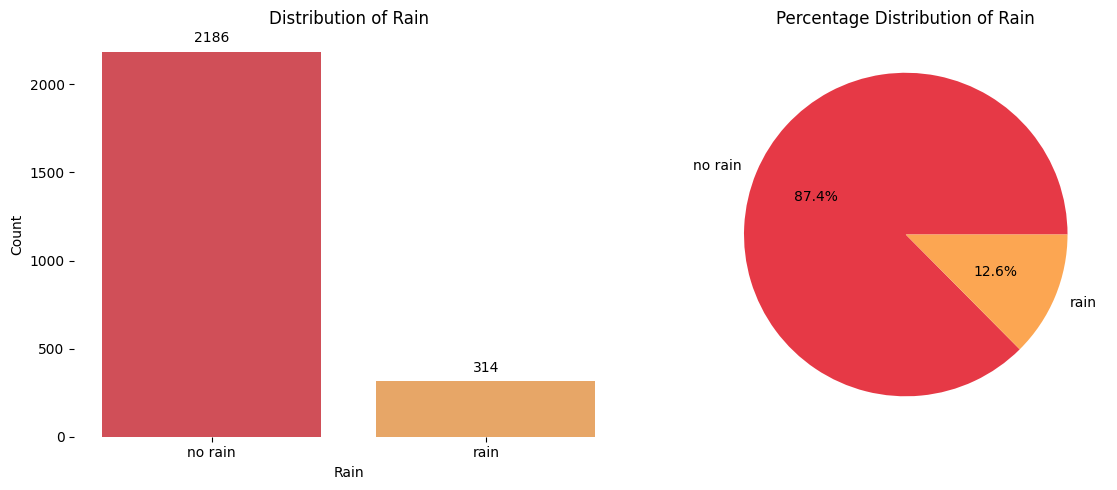

In [10]:
# Define a custom color map
colors = ['#fed8b1', '#fca652', '#fb743e','#f0544f', '#e63946', '#b71c1c']
cmap = LinearSegmentedColormap.from_list("custom_blue_purple", colors, N=256)

# Set the color palette in seaborn
sns.set_palette(sns.color_palette(colors))

# Create subplots for the 'Rain' feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
color_selection = [colors[4], colors[1]]

# Count plot for the Rain feature
rain_counts = df['Rain'].value_counts()
sns.barplot(x=rain_counts.index, y=rain_counts, ax=axes[0], palette=color_selection)
axes[0].set_title('Distribution of Rain')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True)

# Pie chart for the percentage distribution of the Rain feature
rain_percentage = df['Rain'].value_counts(normalize=True) * 100
axes[1].pie(rain_percentage, labels=rain_percentage.index, autopct='%1.1f%%',
            colors=color_selection)
axes[1].set_title('Percentage Distribution of Rain')

plt.tight_layout()
plt.show()

### Observations:
### Class Imbalance:
* The Rain feature is highly imbalanced.
* About 87.4% of the observations correspond to no rain, while only 12.6% correspond to rain.
* This indicates that the majority of days in the dataset did not experience rain.
* The bar plot clearly shows a much larger count of no rain observations compared to rain.
* The pie chart provides a percentage perspective, reinforcing the imbalance in the data.

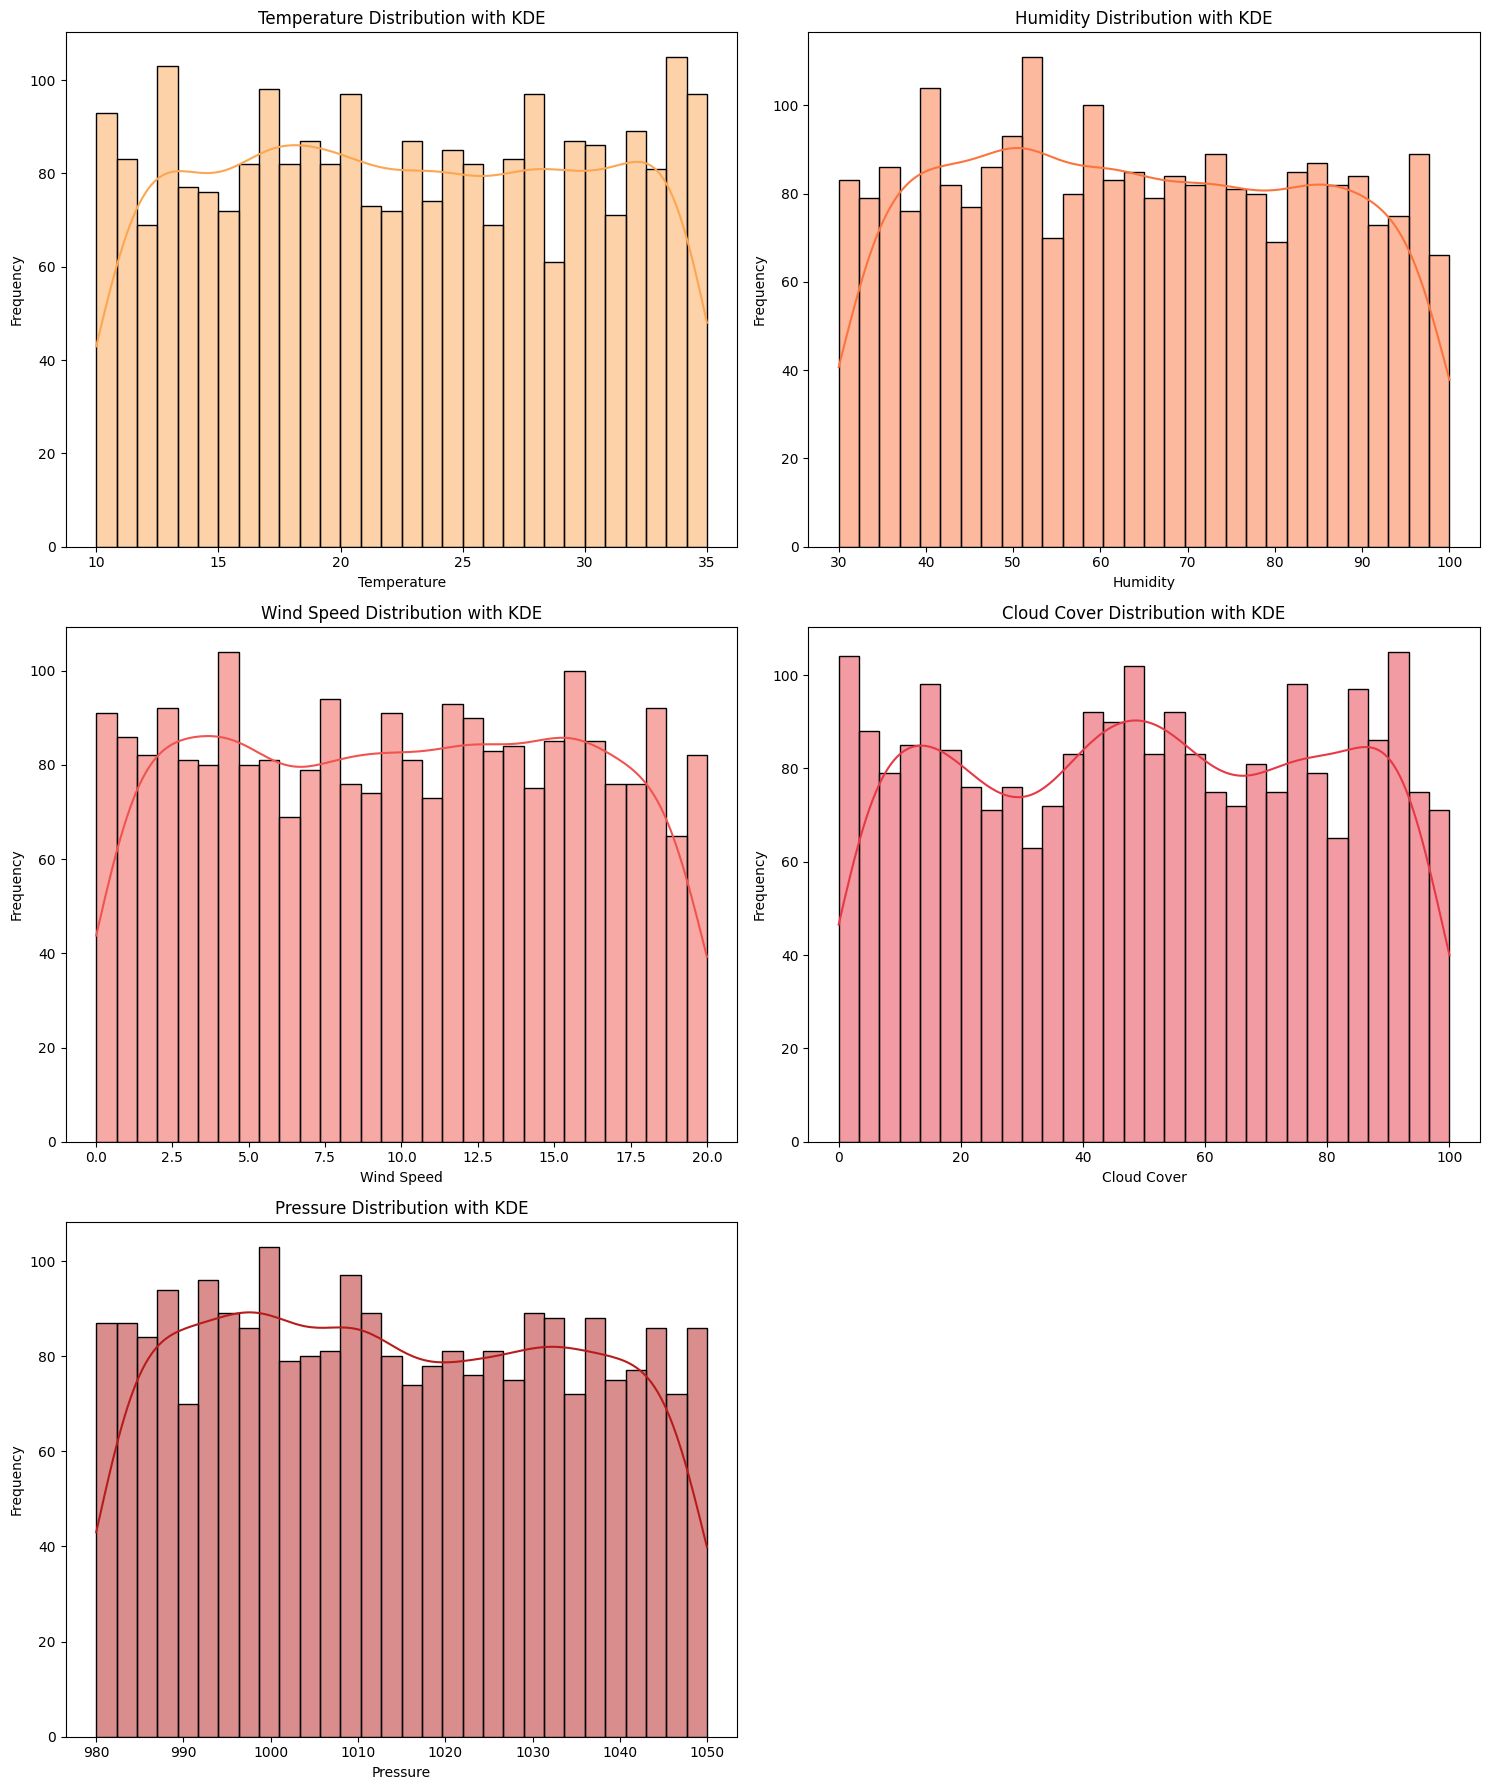

In [11]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 18))

    for i, column in enumerate(columns, 1):
        plt.subplot(3, 2, i)
        sns.histplot(data[column], kde=True, bins=30, color=colors[i % len(colors)])  # Use cyclic color indexing
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

univariate_analysis(df, columns_to_analyze)

### Insights:
1. Temperature: The distribution appears to be approximately normal with a peak around the mean value.
2. Humidity: Shows a slightly right-skewed distribution with a concentration around the mean, with some observations at higher levels.
3. Wind Speed: The distribution is right-skewed, indicating that lower wind speeds are more frequent than higher wind speeds.
4. Cloud Cover: Shows a fairly uniform distribution with values across the entire range, suggesting a variety of cloud cover levels in the data.
5. Pressure: The distribution is centered around the mean with a relatively symmetric shape, indicating that most pressure values are around the average.

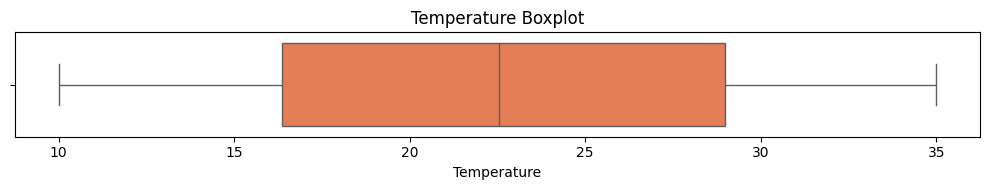


Summary Statistics for Temperature:
 count    2500.000000
mean       22.581725
std         7.326996
min        10.001842
25%        16.359398
50%        22.536448
75%        28.976476
max        34.995214
Name: Temperature, dtype: float64


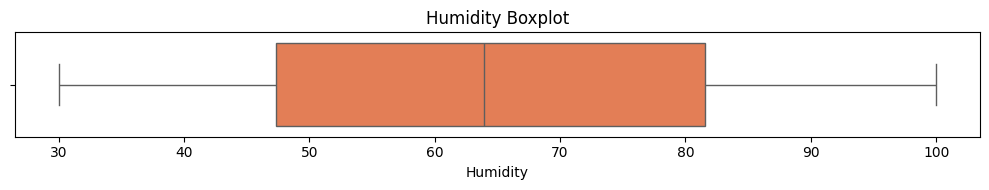


Summary Statistics for Humidity:
 count    2500.000000
mean       64.347094
std        19.954739
min        30.005071
25%        47.339815
50%        63.920797
75%        81.561021
max        99.997481
Name: Humidity, dtype: float64


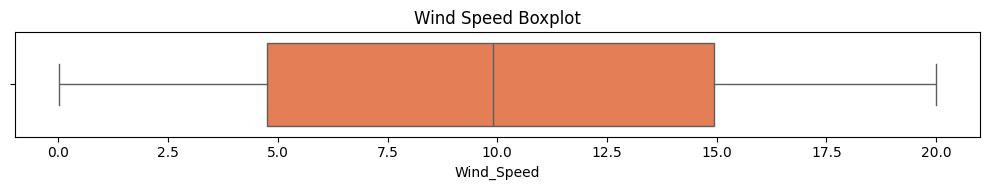


Summary Statistics for Wind Speed:
 count    2500.000000
mean        9.906255
std         5.780316
min         0.009819
25%         4.761909
50%         9.908572
75%        14.948408
max        19.999132
Name: Wind_Speed, dtype: float64


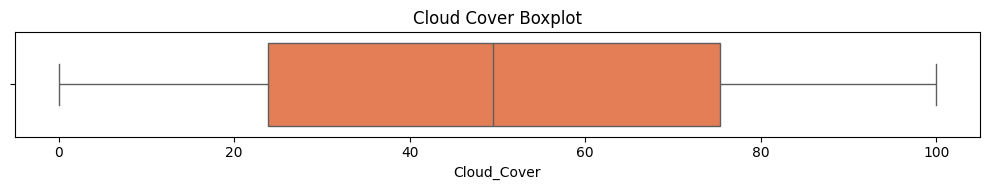


Summary Statistics for Cloud Cover:
 count    2500.000000
mean       49.658104
std        29.123104
min         0.015038
25%        23.900016
50%        49.488284
75%        75.324140
max        99.997795
Name: Cloud_Cover, dtype: float64


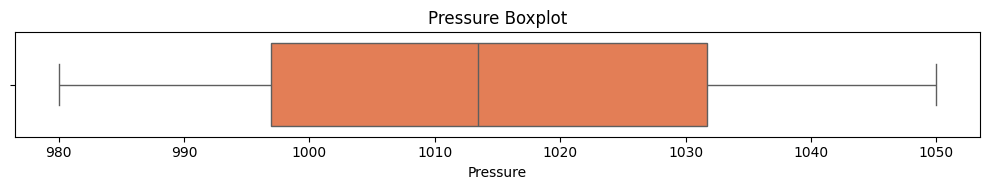


Summary Statistics for Pressure:
 count    2500.000000
mean     1014.312336
std        20.196433
min       980.014486
25%       996.938630
50%      1013.433035
75%      1031.735067
max      1049.985593
Name: Pressure, dtype: float64


In [12]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    # Use a custom color from the palette
    sns.boxplot(x=data[column], color=colors[2])  # Selected a color from the palette for consistency
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

<Figure size 800x500 with 0 Axes>

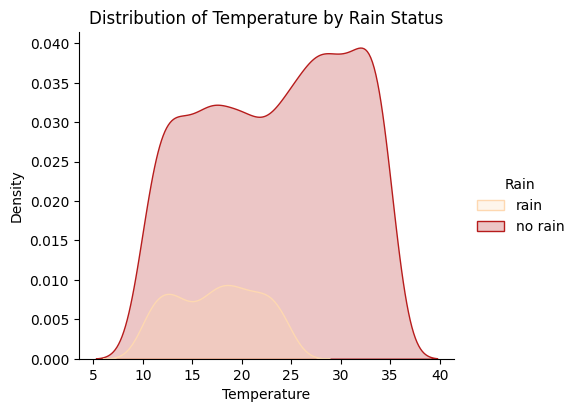

<Figure size 800x500 with 0 Axes>

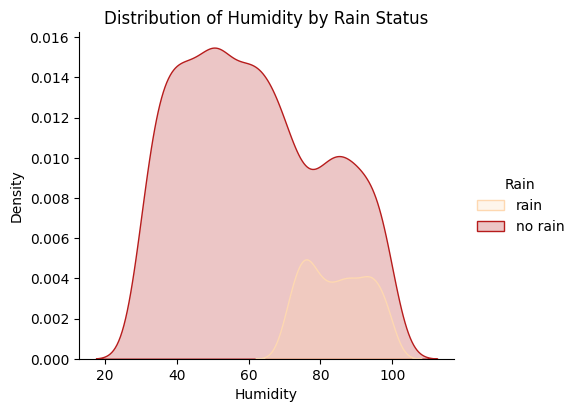

<Figure size 800x500 with 0 Axes>

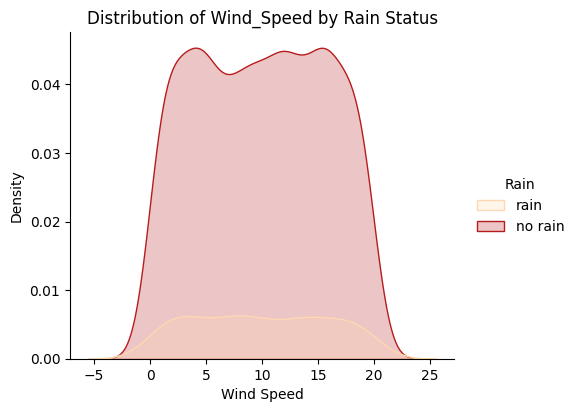

<Figure size 800x500 with 0 Axes>

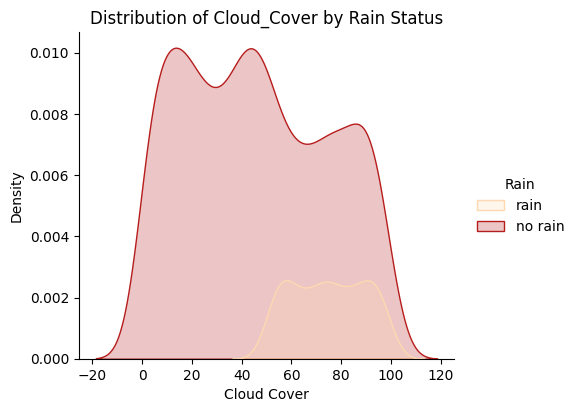

<Figure size 800x500 with 0 Axes>

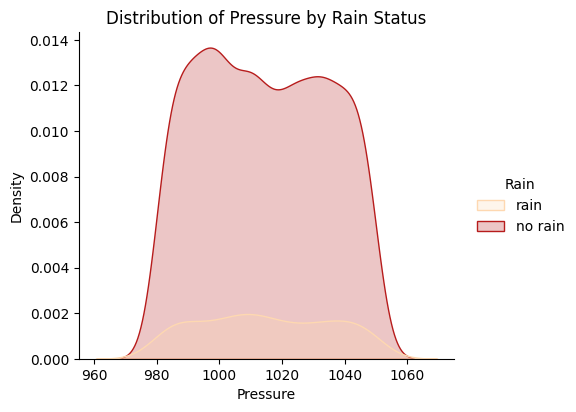

In [13]:
# Loop through each column and create a displot comparing distributions by 'Rain'
for column in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    color_selection = [colors[0], colors[5]]

    sns.displot(
        data=df,
        x=column,
        hue="Rain",
        kind="kde",
        fill=True,
        palette=color_selection,
        height=4,
        aspect=1.2
    )

    plt.title(f'Distribution of {column} by Rain Status')
    plt.xlabel(column.replace('_', ' '))
    plt.ylabel('Density')
    plt.show()

# Observations:

1. **Temperature**:
   - There is a noticeable difference between the `rain` and `no rain` distributions.
   - The `rain` distribution appears to be slightly shifted towards lower temperatures compared to `no rain`.

2. **Humidity**:
   - Higher humidity levels are more associated with `rain`, as shown by the density peak for the `rain` category around higher humidity values.

3. **Wind Speed**:
   - The `rain` distribution shows a slight shift towards lower wind speeds compared to `no rain`.

4. **Cloud Cover**:
   - Higher cloud cover values are more prevalent for the `rain` category, as expected. The `no rain` distribution shows a wider range with a peak around moderate cloud cover values.

5. **Pressure**:
   - Lower pressure values are more commonly associated with `rain`, while `no rain` events are spread over a wider range of pressures.

These observations suggest that certain features such as humidity, cloud cover, and pressure have stronger associations with the `Rain` status.

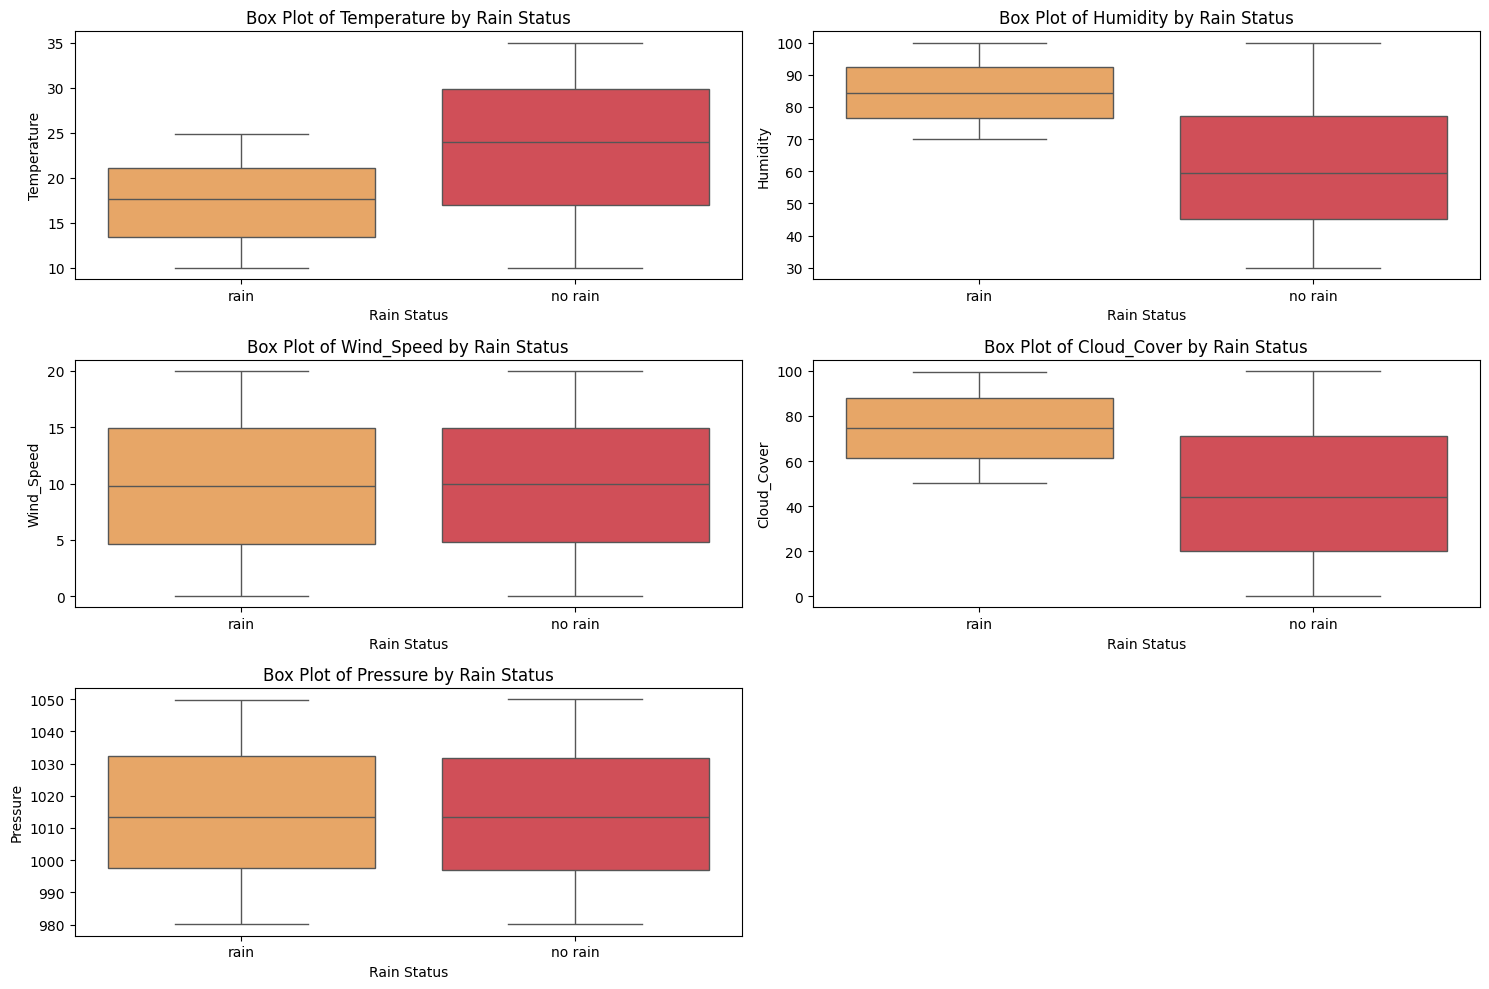

In [14]:
plt.figure(figsize=(15, 10))

# Loop through each column and create a box plot for each feature grouped by 'Rain'
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)

    color_selection = [colors[1], colors[4]]

    sns.boxplot(x='Rain', y=column, data=df, palette=color_selection)
    plt.title(f'Box Plot of {column} by Rain Status')
    plt.xlabel('Rain Status')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Observations:

1. **Temperature**:
  - The median temperature for `rain` events is slightly lower than for `no rain`.
  - There is a notable range of temperatures for both categories, with the interquartile range (IQR) for `no rain` extending to higher values.

2. **Humidity**:
  - The median humidity is higher for `rain` events, as expected.
  - There is a wider distribution of humidity values for `no rain` events, with lower median values.

3. **Wind Speed**:
  - The median wind speed for `rain` is slightly lower than for `no rain`.
  - There is significant overlap in the range of wind speeds for both categories.

4. **Cloud Cover**:
  - Higher cloud cover values are more common for `rain` events, with a higher median compared to `no rain`.
  - The range of cloud cover values is wider for `no rain`, but the distribution shows a lower median.

5. **Pressure**:
  - The median pressure is lower for `rain` events compared to `no rain`.
  - There is a broader distribution of pressure values for `no rain` events.

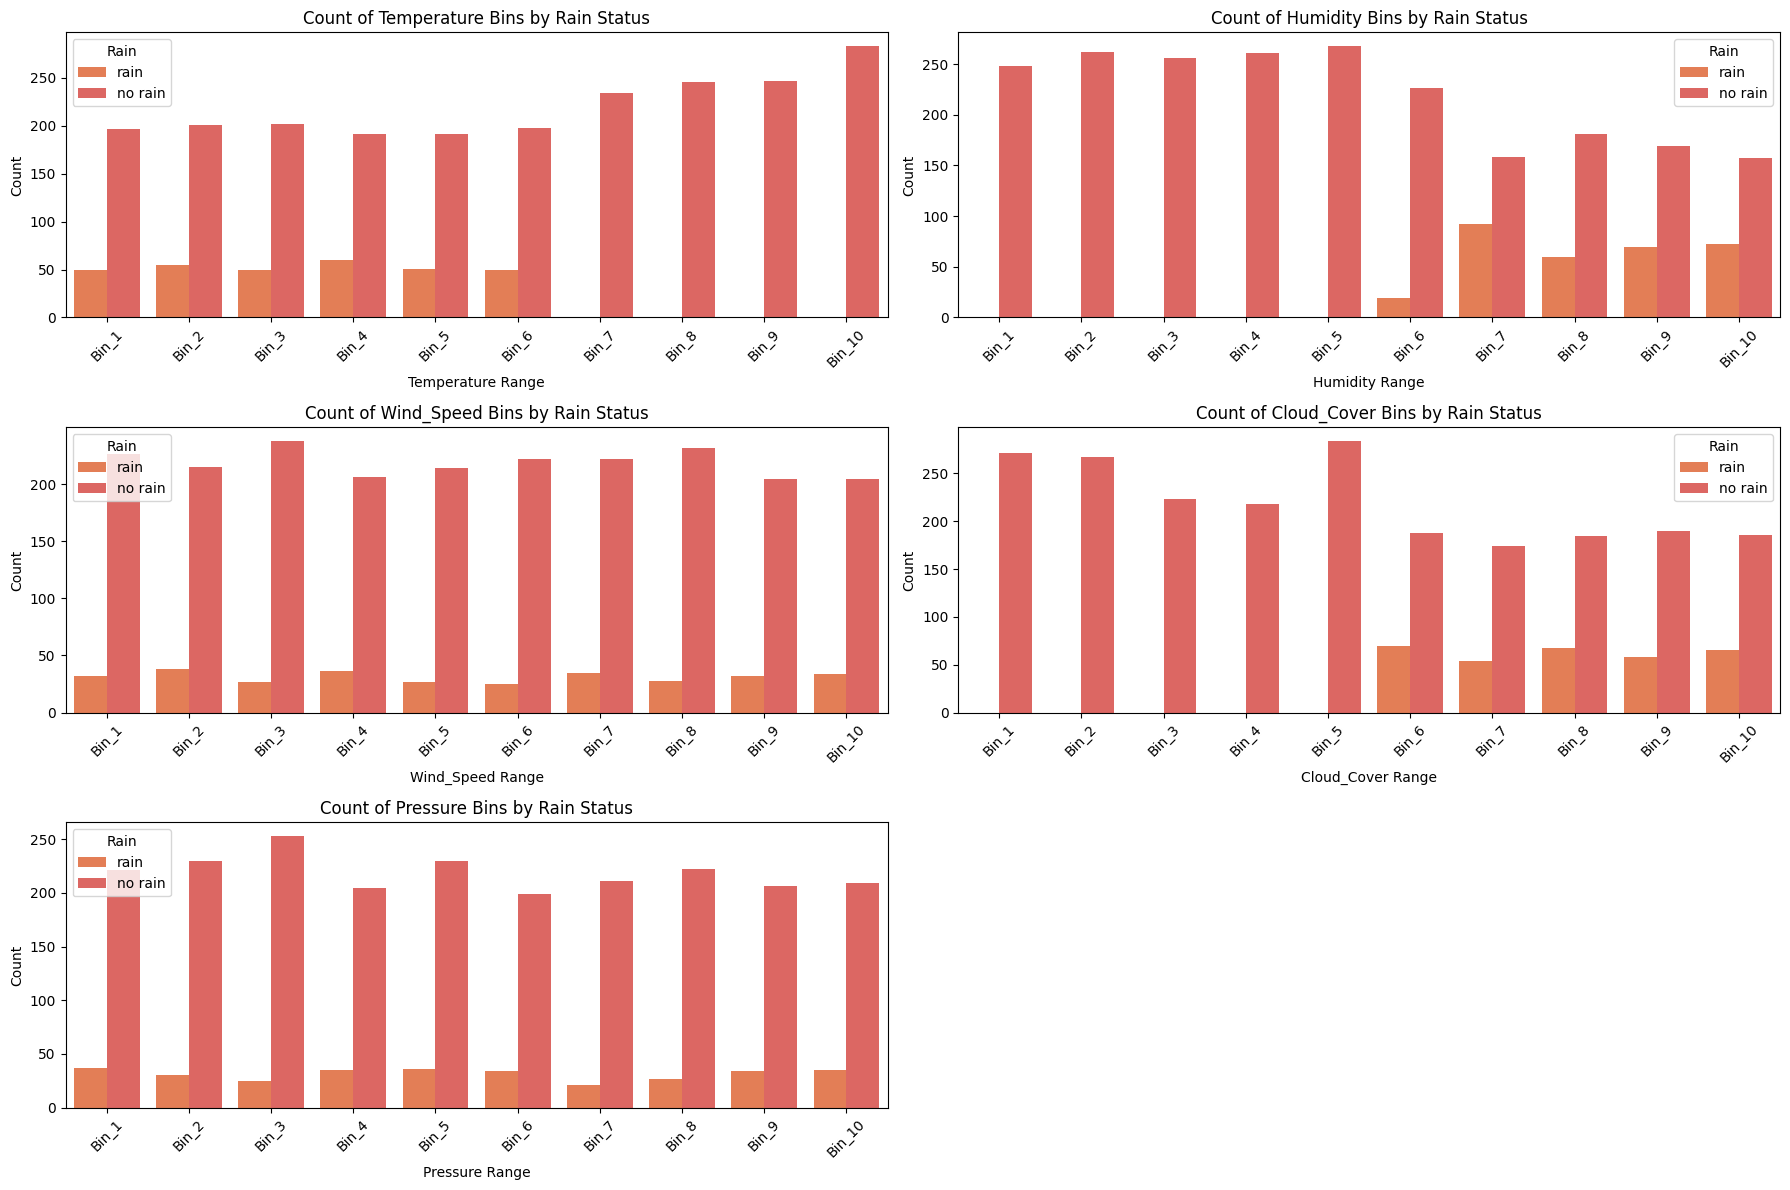

In [15]:
# Create a figure and set its size
plt.figure(figsize=(18, 12))
color_selection = [colors[2], colors[3]]

# Loop through each column and create a count plot for binned data
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)
    # Create bins for each numerical column
    bins = pd.cut(df[column], bins=10, labels=[f'Bin_{j+1}' for j in range(10)])
    # Count plot for each binned data
    sns.countplot(x=bins, hue=df['Rain'], palette=color_selection)
    plt.title(f'Count of {column} Bins by Rain Status')
    plt.xlabel(f'{column} Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Observations:

1. **Temperature**:
  - Most `no rain` observations are distributed across bins with higher temperature ranges.
  - `Rain` events have a relatively even distribution across a moderate range of bins but are generally concentrated in lower temperature bins compared to `no rain`.

2. **Humidity**:
  - Higher bins for humidity show a significant increase in the count of `rain` events.
  - Lower humidity bins are dominated by `no rain` observations.

3. **Wind Speed**:
  - There is a relatively even distribution of `no rain` events across different wind speed bins.
  - `Rain` events tend to have more counts in bins with lower wind speeds.

4. **Cloud Cover**:
  - Higher cloud cover bins have a higher count of `rain` observations.
  - Lower bins for cloud cover are mostly populated with `no rain` observations.

5. **Pressure**:
  - `Rain` events are more concentrated in lower-pressure bins.
  - `No rain` observations span a broader range of pressure bins.

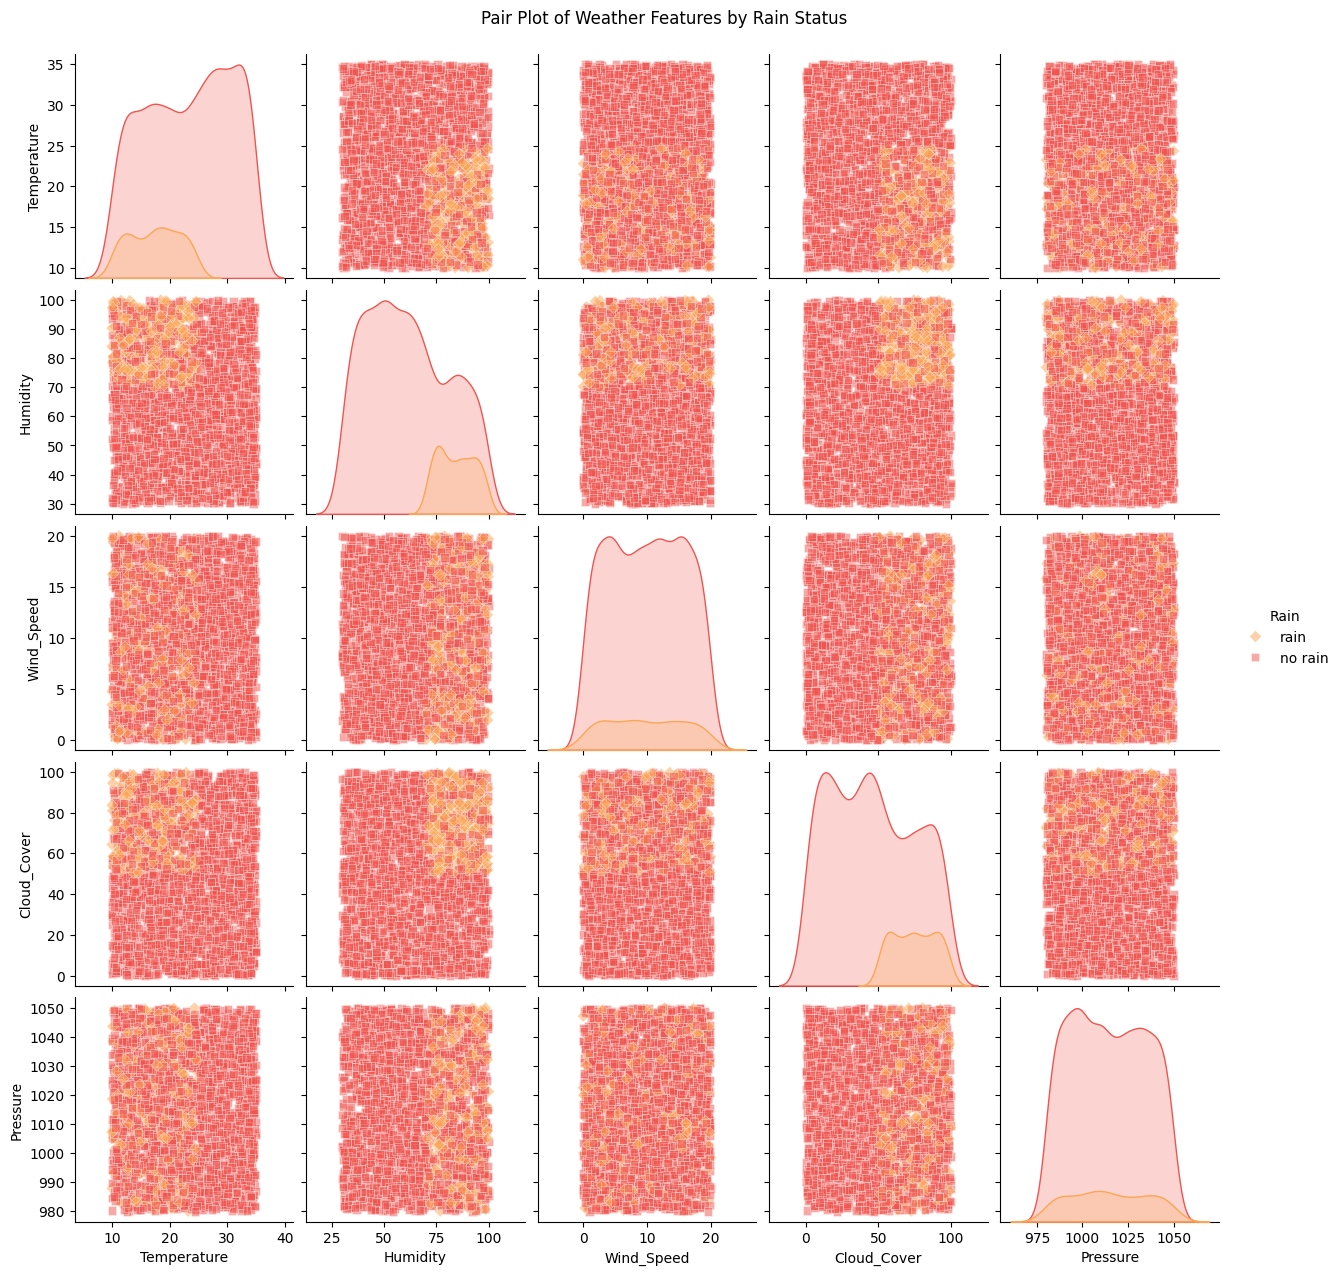

In [16]:
# List of columns to analyze plus the target 'Rain'
columns_for_pairplot = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain']

color_selection = [colors[1], colors[3]]

# Create the pair plot
pairplot = sns.pairplot(df[columns_for_pairplot], hue='Rain', palette=color_selection,
                        markers=["D", "s"],
                        plot_kws={'alpha': 0.5})
pairplot.fig.suptitle('Pair Plot of Weather Features by Rain Status', y=1.02)
plt.show()

# Observations:

- **Scatter Plots**: These show relationships between pairs of features, color-coded by `Rain` status (`rain` and `no rain`). Some features, such as `Humidity` and `Cloud_Cover`, show clustering or separation for different `Rain` categories.

The pair plot highlights the relationships between the features and their potential influence on predicting `Rain`.

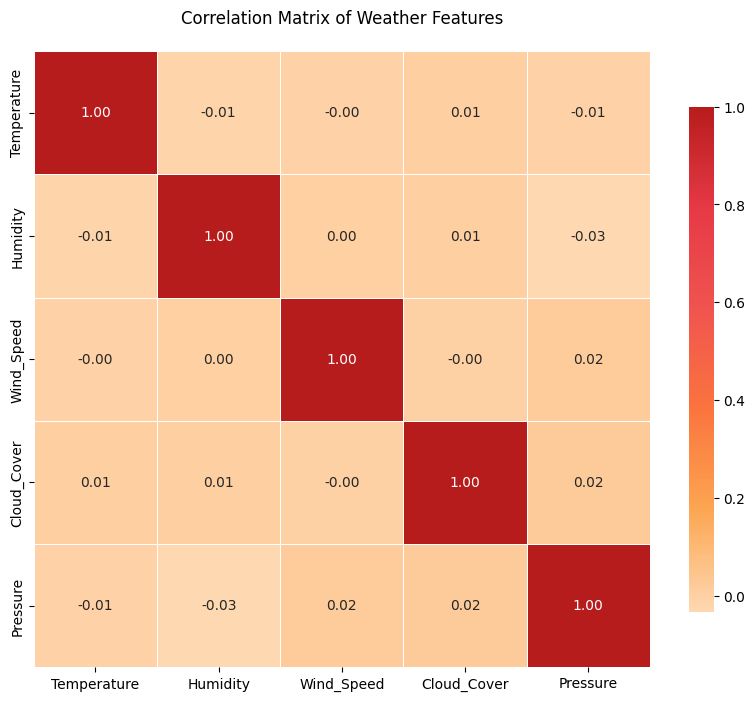

In [17]:
# Calculate the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=True,
            cbar_kws={"shrink": .82},
            linewidths=.5, square=True)

# Title for the heatmap
plt.title('Correlation Matrix of Weather Features', pad=20)
plt.show()

# Observations:

- **Low Correlation Among Features**: The correlation values between the features are all close to 0, indicating very weak or no linear relationship between the features.

- **Independence of Features**: This suggests that the weather features in this dataset do not exhibit strong linear dependencies on each other, which could be beneficial for modeling since it reduces the risk of multicollinearity.




---


# Phase 3: Data Preparation

## Actions

1. Handle Missing Values:
   - Impute or drop missing data as necessary.

2. Feature Engineering:
   - Create derived features if needed.
   - Scale numerical data and encode categorical variables.

3. Train-Test Split:
   - Split the dataset into training and testing sets for model validation.

4. Anomaly detection and removal

In [18]:
# Label Encoding for 'Rain' to ensure it's in binary form
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})
data = data.dropna()

# Splitting data based on 'Rain' values (0 = no rain, 1 = rain)
rain_data = df[df['Rain'] == 1]
no_rain_data = df[df['Rain'] == 0]

### Label Mapping:
- `'no rain'`: 0
- `'rain'`: 1

This transformation converts the categorical target variable into a numeric form, making it suitable for use in machine learning models.

# <span style="color:transparent;">Hypothesis Testing</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #0077b6; padding: 10px; background-color: #add8e6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #0077b6; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Hypothesis Testing</h1>
</div>


#### 1. Humidity

- **Null Hypothesis (H₀)**: There is no significant relationship between `Humidity` and the occurrence of `Rain`.
- **Alternative Hypothesis (Hₐ)**: There is a significant relationship between `Humidity` and the occurrence of `Rain`.

#### 2. Cloud Cover

- **Null Hypothesis (H₀)**: There is no significant relationship between `Cloud_Cover` and the occurrence of `Rain`.
- **Alternative Hypothesis (Hₐ)**: There is a significant relationship between `Cloud_Cover` and the occurrence of `Rain`.

#### 3. Temperature

- **Null Hypothesis (H₀)**: There is no significant relationship between `Temperature` and the occurrence of `Rain`.
- **Alternative Hypothesis (Hₐ)**: There is a significant relationship between `Temperature` and the occurrence of `Rain`.

#### 4. Pressure

- **Null Hypothesis (H₀)**: There is no significant relationship between `Pressure` and the occurrence of `Rain`.
- **Alternative Hypothesis (Hₐ)**: There is a significant relationship between `Pressure` and the occurrence of `Rain`.

#### 5. Wind Speed

- **Null Hypothesis (H₀)**: There is no significant relationship between `Wind_Speed` and the occurrence of `Rain`.
- **Alternative Hypothesis (Hₐ)**: There is a significant relationship between `Wind_Speed` and the occurrence of `Rain`.

---

#### Explanation:
- **Null Hypothesis (H₀)** assumes that changes in `Humidity`, `Cloud_Cover`, `Temperature`, `Pressure`, or `Wind_Speed` do not have a statistically significant effect on whether it rains or not.
- **Alternative Hypothesis (Hₐ)** suggests that these features have a statistically significant effect on the likelihood of `Rain`.


In [19]:
# Conducting t-tests for each feature
features_to_test = ['Humidity', 'Cloud_Cover', 'Temperature', 'Pressure', 'Wind_Speed']
t_test_results = {}

for feature in features_to_test:
    t_stat, p_value = ttest_ind(rain_data[feature], no_rain_data[feature], equal_var=False)
    t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_value}

    # Adding dynamic hypothesis testing output
    if p_value < 0.05:
        print(f"For {feature}:")
        print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")
        print("  Result: Reject the Null Hypothesis (significant difference in means)\n")
    else:
        print(f"For {feature}:")
        print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")
        print("  Result: Fail to reject the Null Hypothesis (no significant difference in means)\n")

# Displaying results as a dictionary
print("T-Test Results:")
display(pd.DataFrame(t_test_results).T)

For Humidity:
  t-statistic = 35.9038, p-value = 1.1125e-173
  Result: Reject the Null Hypothesis (significant difference in means)

For Cloud_Cover:
  t-statistic = 27.8122, p-value = 1.0413e-116
  Result: Reject the Null Hypothesis (significant difference in means)

For Temperature:
  t-statistic = -20.3212, p-value = 1.0395e-70
  Result: Reject the Null Hypothesis (significant difference in means)

For Pressure:
  t-statistic = 0.4061, p-value = 6.8489e-01
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

For Wind_Speed:
  t-statistic = -0.0680, p-value = 9.4582e-01
  Result: Fail to reject the Null Hypothesis (no significant difference in means)

T-Test Results:


,t_statistic,p_value
Humidity,35.903768,1.112542e-173
Cloud_Cover,27.812173,1.041261e-116
Temperature,-20.321164,1.039472e-70
Pressure,0.406098,6.848861e-01
Wind_Speed,-0.067999,9.458199e-01


### Key Observation:
- **Significant Features**: `Humidity`, `Cloud_Cover`, and `Temperature` show a significant difference in means, suggesting a strong relationship with the occurrence of `Rain`.
- **Non-Significant Features**: `Pressure` and `Wind_Speed` do not show a significant difference, indicating no meaningful relationship with the occurrence of `Rain`.

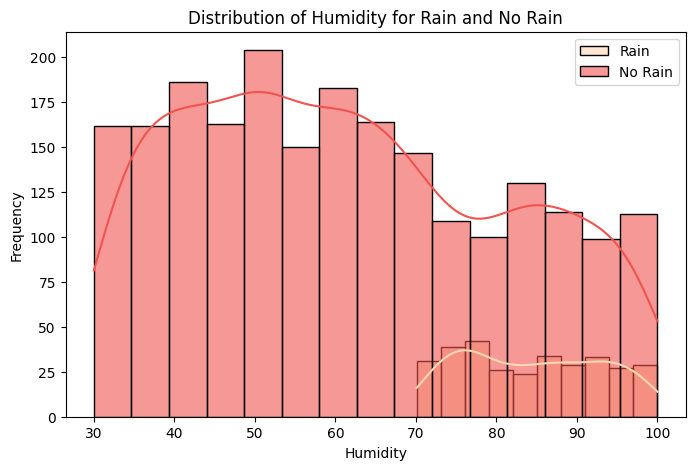

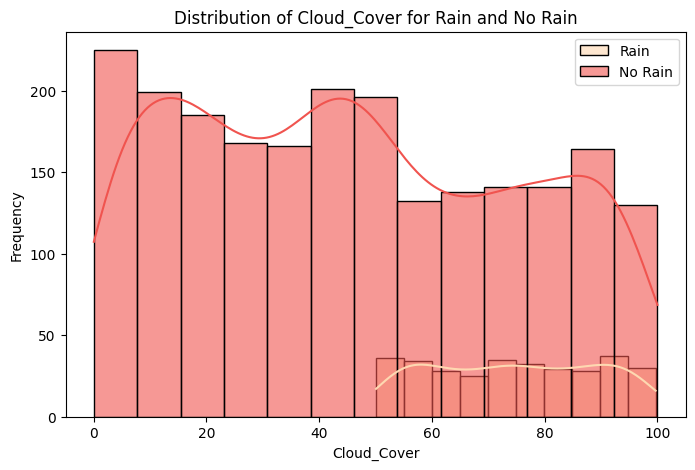

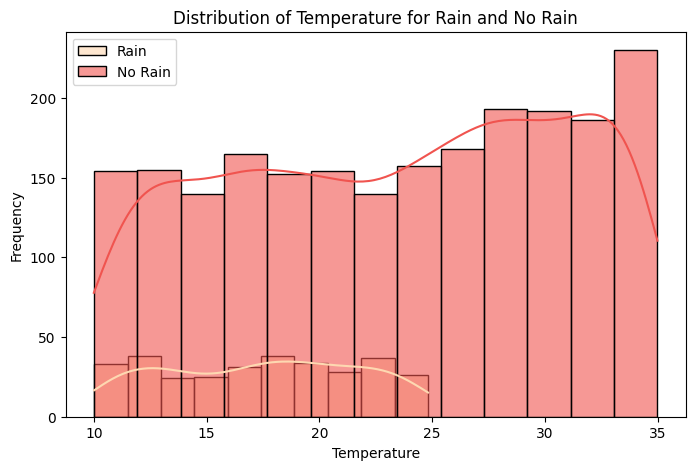

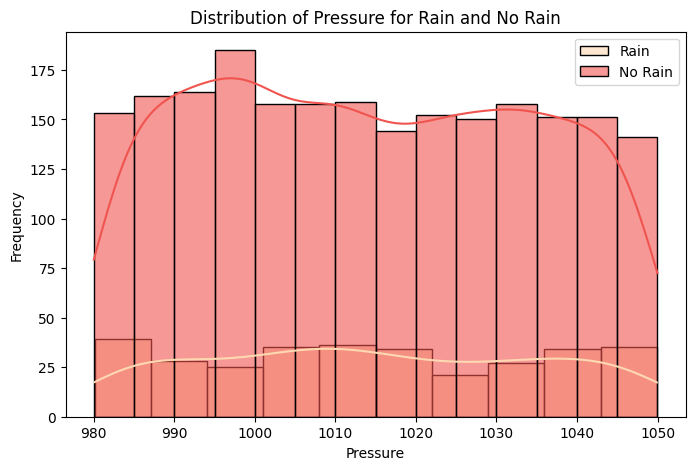

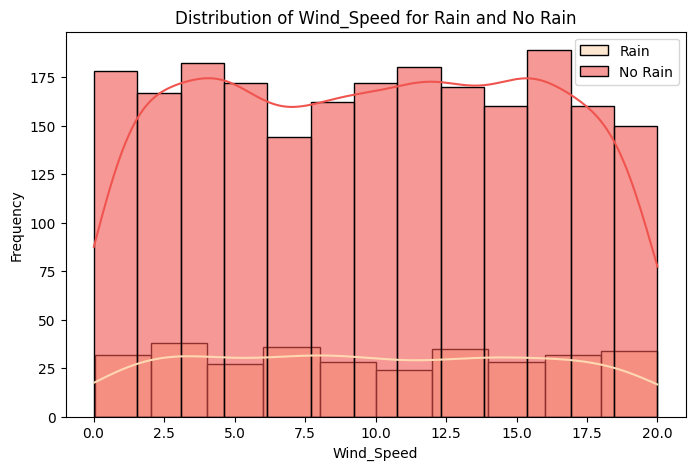

In [20]:
# Define the color selection
color_selection = [colors[0], colors[3]]

# Generate distribution plots
for feature in features_to_test:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=rain_data, x=feature, label='Rain', kde=True, color=color_selection[0], alpha=0.6)
    sns.histplot(data=no_rain_data, x=feature, label='No Rain', kde=True, color=color_selection[1], alpha=0.6)
    plt.title(f'Distribution of {feature} for Rain and No Rain')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

The distribution plots for the tested features (`Humidity`, `Cloud_Cover`, `Pressure`, `Temperature`, and `Wind_Speed`) :

### Observations:
1. **Humidity**:
   - The `Rain` category shows a higher density at higher humidity levels.
   - The `No Rain` category has a broader range but a lower density at high humidity values.

2. **Cloud Cover**:
   - Higher cloud cover values are associated with `Rain`.
   - `No Rain` events have a wider distribution, including lower cloud cover values.

3. **Pressure**:
   - The distributions for `Rain` and `No Rain` overlap significantly.
   - There is no strong visual separation, supporting the earlier hypothesis test result that `Pressure` has no significant relationship with `Rain`.

4. **Temperature**:
   - `Rain` tends to occur at slightly lower temperatures compared to `No Rain`.
   - However, there is substantial overlap between the distributions.

5. **Wind Speed**:
   - The distributions for `Rain` and `No Rain` show a slight separation, with `Rain` more common at lower wind speeds.

In [21]:
correlation_matrix = df.corr()

# Extract correlation with the target variable 'Rain'
target_correlation = correlation_matrix['Rain'].sort_values(ascending=False)

# Display the correlation values with the target variable
styled_correlation = target_correlation.to_frame().style.background_gradient(cmap=cmap)
styled_correlation

,Rain
Rain,1.000000
Humidity,0.382464
Cloud_Cover,0.326216
Pressure,0.008273
Wind_Speed,-0.001389
Temperature,-0.265882


### What the correlations indicate:

- Features with a positive correlation with `Rain` have a higher likelihood of rain with increasing values (e.g., high humidity).
- Features with a negative correlation suggest that as their values increase, the likelihood of rain decreases (e.g., high temperature or pressure).

# <span style="color:transparent;">Anomaly Detection</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #0077b6; padding: 10px; background-color: #add8e6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #0077b6; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Anomaly Detection</h1>
</div>

In [22]:
X = df.drop('Rain', axis=1)  # Exclude the target variable from anomaly detection

In [23]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # 5% contamination by default
iso_forest.fit(X)

# Predict anomalies: -1 indicates an anomaly, 1 indicates normal
outliers = iso_forest.predict(X)

# Add the outlier labels to the DataFrame
df['Anomaly'] = outliers

# Display the counts of normal and anomalous points
print("Anomaly Detection Results:")
print(df['Anomaly'].value_counts())

Anomaly Detection Results:
Anomaly
 1    2375
-1     125
Name: count, dtype: int64


- The Isolation Forest model has identified 125 anomalies (about 5% of the total data, as specified by the `contamination` parameter). This approach helps detect potential outliers or unusual observations in the dataset.

In [24]:
# Identify anomalies in the dataset
anomalies = df[df['Anomaly'] == -1]

# Display the number of anomalies and the first few rows of detected anomalies
print(f"Number of anomalies detected: {anomalies.shape[0]}")
anomalies.head()

Number of anomalies detected: 125


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Anomaly
13,33.139916,90.326477,5.771774,99.910178,987.803792,0,-1
23,29.513229,90.087869,3.520304,0.786690,1040.713073,0,-1
35,25.440887,99.538365,4.169966,92.792009,1042.703411,0,-1
43,11.505637,98.105353,2.380271,85.460413,1048.959121,1,-1
69,12.402460,58.422611,10.303175,97.468345,1049.703355,0,-1


In [25]:
# Remove outliers from the data
df_cleaned = df[df['Anomaly'] == 1].drop(columns=['Anomaly'])

# Phase 4: Modeling

## Actions
1. Test multiple models like Logistic Regression, Random Forest, and Gradient Boosting.
2. Use cross-validation to ensure stability.
3. Evaluate models based on metrics such as accuracy, precision, recall, and F1 score.

In [26]:
# Split the cleaned data into features and target
X_cleaned = df_cleaned.drop('Rain', axis=1)
y_cleaned = df_cleaned['Rain']

In [27]:
# Split the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [28]:
# Displaying the shapes of the resulting datasets for verification
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)

Training features shape: (1900, 5)
Validation features shape: (475, 5)
Training target shape: (1900,)
Validation target shape: (475,)


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [30]:
# Train and evaluate a given model on training and validation data.
def train_and_evaluate_model(name, model, X_train, y_train, X_val, y_val):
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    report = classification_report(y_val, y_pred, output_dict=True)

    print(f"\n{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")

    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=cmap)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    return {
        "Accuracy": accuracy,
        "AUC": auc,
        "Report": pd.DataFrame(report).T,
        "Confusion Matrix": cm
    }

In [31]:
# Perform cross-validation on a given model.
def cross_validate_model(name, model, X, y, cv):
    print(f"Evaluating {name} using cross-validation...")
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(accuracy_score))
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    return {
        "Mean Accuracy": accuracy_scores.mean(),
        "Mean AUC": auc_scores.mean(),
        "Accuracy Scores": accuracy_scores,
        "AUC Scores": auc_scores
    }

In [32]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42)
}

In [33]:
# Split the cleaned data into features and target
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross-validation
cross_val_results = {}
for name, model in models.items():
    cross_val_results[name] = cross_validate_model(name, model, X_cleaned, y_cleaned, cv)

# Display cross-validation results
print("\nCross-Validation Results Summary:\n" + "="*40)
results_df = pd.DataFrame({
    name: {"Mean Accuracy": result["Mean Accuracy"], "Mean AUC": result["Mean AUC"]}
    for name, result in cross_val_results.items()
}).T.sort_values(by="Mean AUC", ascending=False)
print(results_df)
print("="*40)
# Select the best model based on mean AUC
best_model_name = results_df['Mean AUC'].idxmax()
print(f"\nThe best model based on Mean AUC from cross-validation is: {best_model_name} with an AUC of {results_df['Mean AUC'].max():.4f}")


Evaluating Logistic Regression using cross-validation...
Evaluating Decision Tree using cross-validation...
Evaluating Random Forest using cross-validation...
Evaluating XGBoost using cross-validation...
Evaluating LightGBM using cross-validation...

Cross-Validation Results Summary:
                     Mean Accuracy  Mean AUC
XGBoost                   0.999579  1.000000
Random Forest             0.998316  0.999992
LightGBM                  0.997895  0.998867
Decision Tree             0.999158  0.998093
Logistic Regression       0.932211  0.966511

The best model based on Mean AUC from cross-validation is: XGBoost with an AUC of 1.0000


Training XGBoost...

XGBoost Results:
  Accuracy: 0.9958
  AUC: 0.9991


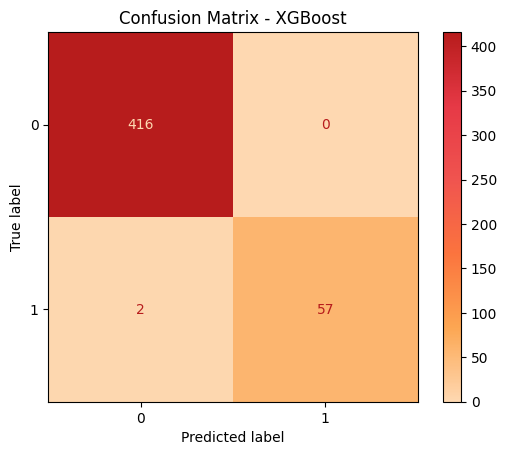

In [34]:
best_model = models[best_model_name]
results = train_and_evaluate_model(best_model_name, best_model, X_train, y_train, X_val, y_val)

### Summary:
- The XGBoost model exhibited strong predictive performance with minimal misclassifications.
- The absence of false positives and only two false negatives indicates a strong ability to correctly identify instances of `Rain` and `No Rain`.
- While high accuracy and AUC suggest a powerful model, it is essential to remain cautious about overfitting, given that nearly perfect performance can sometimes indicate potential issues with data leakage or overly simple patterns in the data.

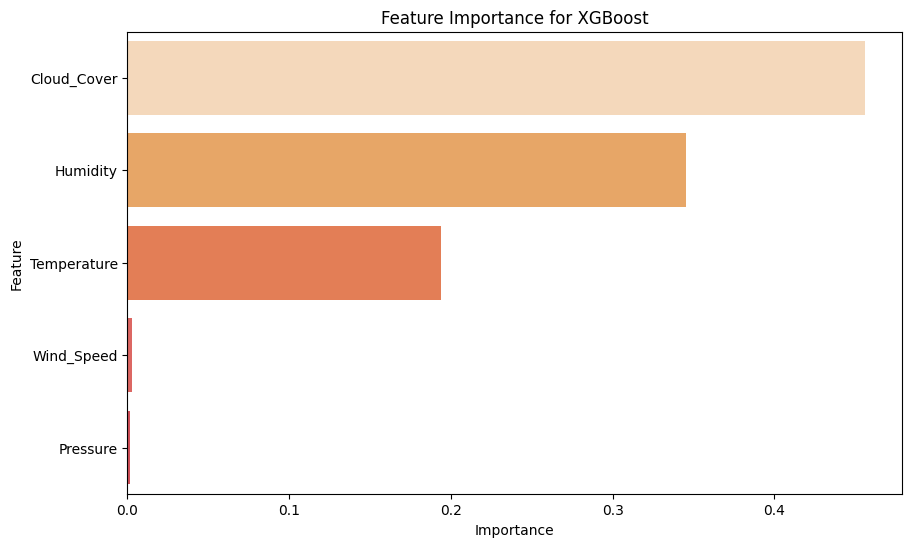

In [35]:
# Check if the best model has a feature_importances_ attribute
if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    feature_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df, palette=colors)
    plt.title(f'Feature Importance for {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print(f"The selected model ({best_model_name}) does not support feature importances.")



**Feature Importance Plot (XGBoost)**:
   - This plot displays the relative importance of each feature used by the XGBoost model for predictions.
   - **Cloud Cover** appears to be the most important feature, contributing significantly more than the other features.
   - **Humidity** is the second most important feature, followed by **Temperature**.
   - **Wind Speed** and **Pressure** have negligible importance in predicting `Rain`.
   - **Interpretation**: The model heavily relies on `Cloud Cover` and `Humidity`, indicating these features have strong predictive power for distinguishing between `Rain` and `No Rain`.

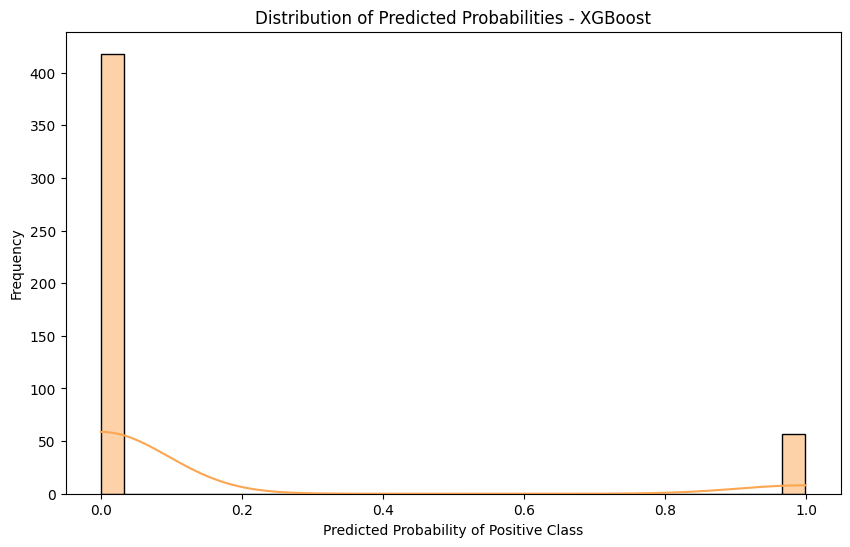

In [36]:
# Predicted probabilities for the positive class from the best model
y_prob = best_model.predict_proba(X_val)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_prob, bins=30, kde=True, color=colors[1])
plt.title(f'Distribution of Predicted Probabilities - {best_model_name}')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.show()

**Distribution of Predicted Probabilities - XGBoost**:
   - This histogram shows the distribution of predicted probabilities for the positive class (i.e., `Rain`).
   - The majority of predictions are skewed towards the extremes (0 or 1), indicating high confidence in most of the predictions.
   - **Interpretation**: The model is confident in its predictions, with most instances predicted as either very likely `No Rain` (probability near 0) or `Rain` (probability near 1). This is consistent with high AUC values and suggests effective classification.

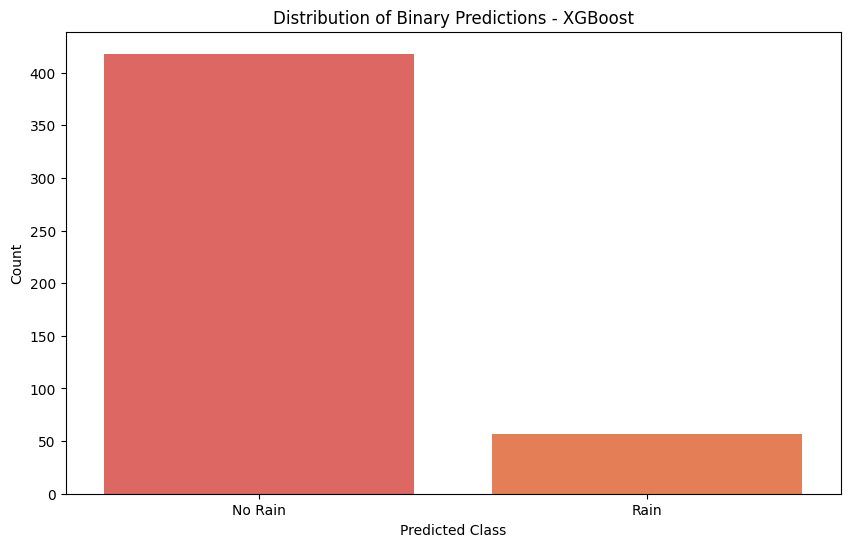

In [37]:
# Predicted binary labels
y_pred = best_model.predict(X_val)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette=[colors[3], colors[2]])
plt.title(f'Distribution of Binary Predictions - {best_model_name}')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.show()


**Distribution of Binary Predictions - XGBoost**:
   - This bar plot shows the counts of binary predictions made by the XGBoost model for `Rain` and `No Rain`.
   - There is a significantly higher count of `No Rain` predictions compared to `Rain`.
   - **Interpretation**: The imbalance in predicted classes reflects the class distribution of the original data, where `No Rain` cases are much more common. The model accurately captures this distribution, as evidenced by its strong performance metrics.